In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# generating a set of numbers with poisson distribution

lam=0.6
# N is the number of jumps
nj=10**5
po=np.random.poisson(lam, nj)


# generating a time series which is 1 for jumps and zero for times with no jump
# the distribution for the distance between jumps is a poisson distribution

j=np.zeros((sum(po)+nj))
n=0

for i in range (nj):
    for k in range(po[i]):
        j[n]=0
        n+=1
        
    j[n]=1
    n+=1

    
# n is the number of our time steps    
n=len(j)

print(nj/n)

0.6250273449463414


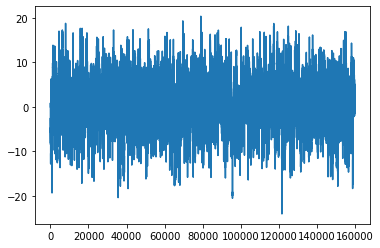

In [3]:
# Solving the equation for poisson process numerically 

x=np.zeros(n)

# initial value for x
x[0]=0.001

# dt -> time increment
dt=0.01
sqrt_dt=np.sqrt(dt)

# producing a gaussian random time series for each realization
f=np.random.normal(0,1,size=n)
xi=np.random.normal(0,1,size=n)   

for i in range(1,n):
# computing w(t) using Euler method 
    
    x[i] = x[i-1]  -  x[i-1] * dt  +  np.sqrt(2) * sqrt_dt * f[i-1]  +  xi[i-1] * j[i-1]
            
        
# ploting x versus t        
plt.plot(x)
plt.show()

Text(0.5, 0, 'x')

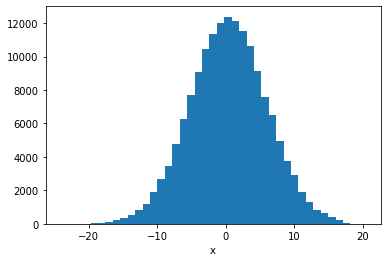

In [40]:
#histogram of x
plt.hist(x,bins=41);
plt.xlabel('x')

In [4]:
# kramers-moyal coefficients 

l=41

M1=np.zeros((l))
M2=np.zeros((l))
M3=np.zeros((l))
M4=np.zeros((l))
M5=np.zeros((l))
M6=np.zeros((l))

nn=np.zeros((l))
m=min(x)
M=max(x)

d=(M-m)/l

for i in range(n-1):
    k=int(np.floor((x[i]-m)/d))
    if k==l:
            k=l-1
    nn[k]+=1
       
    M1[k]=M1[k]+x[i+1]-x[i]
    M2[k]=M2[k]+(x[i+1]-x[i])**2
    M3[k]=M3[k]+(x[i+1]-x[i])**3
    M4[k]=M4[k]+(x[i+1]-x[i])**4
    M5[k]=M5[k]+(x[i+1]-x[i])**5
    M6[k]=M6[k]+(x[i+1]-x[i])**6

    
M1=M1/(dt*nn)
M2=M2/(dt*nn)
M3=M3/(dt*nn)
M4=M4/(dt*nn)
M5=M5/(dt*nn)
M6=M6/(dt*nn)

# xx is x axis values
xx=np.arange(l)
xx=min(x)+(2*xx+1)*d/2

# calculation for lambda and sigma^2 _xi 
sigma_xi_2=M6/(5*M4)
lambda_x=dt * M4/(3*sigma_xi_2**2)

In [7]:
#computing error for each M, sigma^2_xi and lambda

pdf=nn/n
error=np.sqrt(1-pdf)/nn

error1=(error/dt)

error2=2*M2*(error/dt)/xx

error4=4*M4*(error/dt)/xx

error6=6*M6*(error/dt)/xx

error_s = sigma_xi_2*(error6/M6 + error4/M4)

error_lambda = lambda_x*(error4/M4 + error_s/sigma_xi_2)


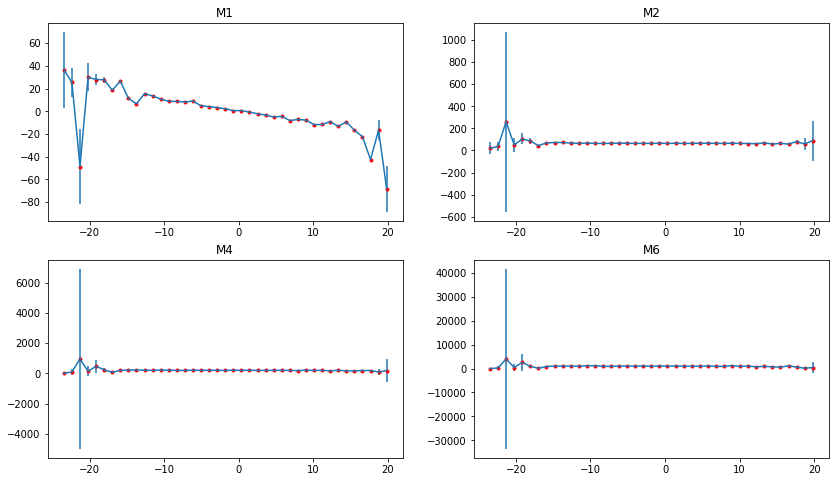

In [27]:
plt.figure(figsize=(14,8))

plt.subplot(2,2,1)
plt.plot(xx,M1,'r.')
plt.errorbar(xx,M1,error1)
plt.title('M1')

plt.subplot(2,2,2)
plt.plot(xx,M2,'r.')
plt.errorbar(xx,M2,error2)
plt.title('M2')

plt.subplot(2,2,3)
plt.plot(xx,M4,'r.')
plt.errorbar(xx,M4,error4)
plt.title('M4')

plt.subplot(2,2,4)
plt.plot(xx,M6,'r.')
plt.errorbar(xx,M6,error6)
plt.title('M6')

plt.show() 

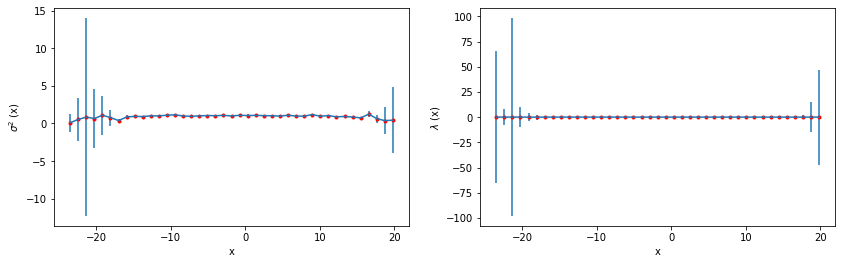

In [25]:
plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
plt.plot(xx,sigma_xi_2,'r.')
plt.errorbar(xx,sigma_xi_2,error_s)
plt.xlabel('x')
plt.ylabel('$\sigma^{2}$ (x)' )


plt.subplot(1,2,2)
plt.plot(xx,dt*lambda_x,'r.')
plt.errorbar(xx,dt*lambda_x,error_lambda)
plt.xlabel('x')
plt.ylabel('$\lambda$ (x)')


plt.show() 